# Five Personality Traits Clustering
---

# Introduction


The Big Five personality traits, also known as the Five Factor Model (FFM), provide a framework to describe human personality across five dimensions:

### 1. Openness to Experience
- **Description:** Reflects an individual's inclination towards novelty, imagination, and intellectual curiosity.
- **Characteristics:** Openness involves traits like creativity, appreciation for art, intellectual curiosity, and a willingness to try new things.

### 2. Conscientiousness
- **Description:** Indicates a person's level of organization, discipline, and responsibility.
- **Characteristics:** Conscientious individuals tend to be organized, reliable, diligent, goal-oriented, and responsible in their actions.

### 3. Extraversion
- **Description:** Measures the degree of sociability, assertiveness, and energy an individual exhibits.
- **Characteristics:** Extraverts are outgoing, energetic, assertive, and often seek social stimulation. They tend to enjoy the company of others.

### 4. Agreeableness
- **Description:** Evaluates one's level of empathy, cooperativeness, and kindness towards others.
- **Characteristics:** Agreeable individuals are empathetic, considerate, cooperative, and tend to prioritize social harmony in interactions.

### 5. Neuroticism (Emotional Stability)
- **Description:** Reflects the tendency towards negative emotions, such as anxiety, depression, or moodiness.
- **Characteristics:** Individuals high in neuroticism may be prone to stress, anxiety, mood swings, and experience negative emotions more frequently.

The Big Five traits provide a comprehensive framework to understand various aspects of an individual's personality, offering insights into how people tend to think, feel, and behave across different situations. These traits are often used in psychology, human resources, and various fields to assess personality and behavior.

**source** : https://www.thomas.co/resources/type/hr-guides/what-are-big-5-personality-traits

# Problem Statement

To perform clustering analysis on a dataset comprising individual's scores across the five personality traits, aiming to identify distinct groups or clusters based on their personality profiles. Then save the model to predict an individual's personality trait.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# PCA
from sklearn.decomposition import PCA

# elbow & silhouette for PCA
from yellowbrick.cluster import KElbowVisualizer

# cluster
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
import pickle

# Data Loading

This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm
Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

| Category              | Statement                               |
|-----------------------|-----------------------------------------|
| Extraversion (EXT)    |                                         |
| EXT1                  | I am the life of the party.              |
| EXT2                  | I don't talk a lot.                      |
| EXT3                  | I feel comfortable around people.        |
| EXT4                  | I keep in the background.                |
| EXT5                  | I start conversations.                    |
| EXT6                  | I have little to say.                    |
| EXT7                  | I talk to a lot of different people at parties. |
| EXT8                  | I don't like to draw attention to myself. |
| EXT9                  | I don't mind being the center of attention. |
| EXT10                 | I am quiet around strangers.             |
| Neuroticism (EST)     |                                         |
| EST1                  | I get stressed out easily.               |
| EST2                  | I am relaxed most of the time.           |
| EST3                  | I worry about things.                    |
| EST4                  | I seldom feel blue.                      |
| EST5                  | I am easily disturbed.                   |
| EST6                  | I get upset easily.                      |
| EST7                  | I change my mood a lot.                  |
| EST8                  | I have frequent mood swings.             |
| EST9                  | I get irritated easily.                  |
| EST10                 | I often feel blue.                       |
| Agreeableness (AGR)   |                                         |
| AGR1                  | I feel little concern for others.        |
| AGR2                  | I am interested in people.               |
| AGR3                  | I insult people.                         |
| AGR4                  | I sympathize with others' feelings.      |
| AGR5                  | I am not interested in other people's problems. |
| AGR6                  | I have a soft heart.                     |
| AGR7                  | I am not really interested in others.    |
| AGR8                  | I take time out for others.              |
| AGR9                  | I feel others' emotions.                 |
| AGR10                 | I make people feel at ease.              |
| Conscientiousness (CSN)|                                         |
| CSN1                  | I am always prepared.                    |
| CSN2                  | I leave my belongings around.            |
| CSN3                  | I pay attention to details.              |
| CSN4                  | I make a mess of things.                 |
| CSN5                  | I get chores done right away.            |
| CSN6                  | I often forget to put things back in their proper place. |
| CSN7                  | I like order.                            |
| CSN8                  | I shirk my duties.                       |
| CSN9                  | I follow a schedule.                     |
| CSN10                 | I am exacting in my work.                |
| Openness to Experience (OPN) |                                     |
| OPN1                  | I have a rich vocabulary.                |
| OPN2                  | I have difficulty understanding abstract ideas. |
| OPN3                  | I have a vivid imagination.              |
| OPN4                  | I am not interested in abstract ideas.   |
| OPN5                  | I have excellent ideas.                  |
| OPN6                  | I do not have a good imagination.        |
| OPN7                  | I am quick to understand things.         |
| OPN8                  | I use difficult words.                   |
| OPN9                  | I spend time reflecting on things.       |
| OPN10                 | I am full of ideas.                      |


In [2]:
# load data to pandas dataframe
df = pd.read_csv("data-final.csv", delimiter='\t')
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [4]:
# get questionaire only columns
questionaire = df.columns.tolist()[:50]
data = df[questionaire]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   EXT1    1013558 non-null  float64
 1   EXT2    1013558 non-null  float64
 2   EXT3    1013558 non-null  float64
 3   EXT4    1013558 non-null  float64
 4   EXT5    1013558 non-null  float64
 5   EXT6    1013558 non-null  float64
 6   EXT7    1013558 non-null  float64
 7   EXT8    1013558 non-null  float64
 8   EXT9    1013558 non-null  float64
 9   EXT10   1013558 non-null  float64
 10  EST1    1013558 non-null  float64
 11  EST2    1013558 non-null  float64
 12  EST3    1013558 non-null  float64
 13  EST4    1013558 non-null  float64
 14  EST5    1013558 non-null  float64
 15  EST6    1013558 non-null  float64
 16  EST7    1013558 non-null  float64
 17  EST8    1013558 non-null  float64
 18  EST9    1013558 non-null  float64
 19  EST10   1013558 non-null  float64
 20  AGR1    1013558 non-null

In [5]:
# check missing values
data.isnull().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

In [6]:
data[data.isnull().any(axis=1)]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
78795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop missing values
data.dropna(inplace=True)

In [8]:
# check duplicates
data.duplicated().sum()

4772

In [9]:
# drop duplicates
data.drop_duplicates(inplace=True)

# Scaling

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=questionaire)
scaled_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,0.2,1.0,0.4,0.8,0.2,...,1.0,0.2,0.8,0.2,0.8,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,0.6,0.4,1.0,0.2,1.0,...,0.2,0.4,0.8,0.4,0.6,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,0.4,0.2,0.6,0.4,1.0,...,1.0,0.2,0.4,0.2,0.8,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,0.4,0.4,0.8,0.2,0.8,...,0.8,0.4,1.0,0.4,0.6,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,0.6,0.6,1.0,0.6,0.8,...,1.0,0.2,1.0,0.2,1.0,0.2,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008781,0.8,0.4,0.8,0.6,0.8,0.6,0.6,0.6,0.6,0.6,...,0.4,0.4,0.8,0.6,0.8,0.4,0.8,0.4,0.4,0.8
1008782,0.8,0.6,0.8,0.6,0.6,0.6,0.8,0.8,0.6,0.6,...,0.8,0.2,1.0,0.2,1.0,0.2,0.6,0.8,1.0,0.8
1008783,0.8,0.4,0.8,0.6,1.0,0.2,0.8,0.4,0.8,0.8,...,1.0,0.2,1.0,0.2,0.8,0.2,1.0,1.0,0.8,1.0
1008784,0.4,0.8,0.6,0.8,0.4,0.4,0.2,0.8,0.4,0.8,...,1.0,0.4,0.8,0.4,0.6,0.4,0.8,1.0,1.0,0.6


# Model Definition

In [12]:
kmeans = KMeans(init='k-means++')

In [13]:
# elbow method
print('Elbow Method')
Elbow_M = KElbowVisualizer(kmeans, k=10)
Elbow_M.fit(scaled_data)
Elbow_M.show()

Elbow Method


# Clustering

In [ ]:
kmeans.n_clusters = 5
kmeans.fit(scaled_data)

KMeans(n_clusters=5)

In [ ]:
clusters = kmeans.predict(scaled_data)

In [ ]:
data['cluster'] = clusters
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,cluster
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2


# Visualize Cluster

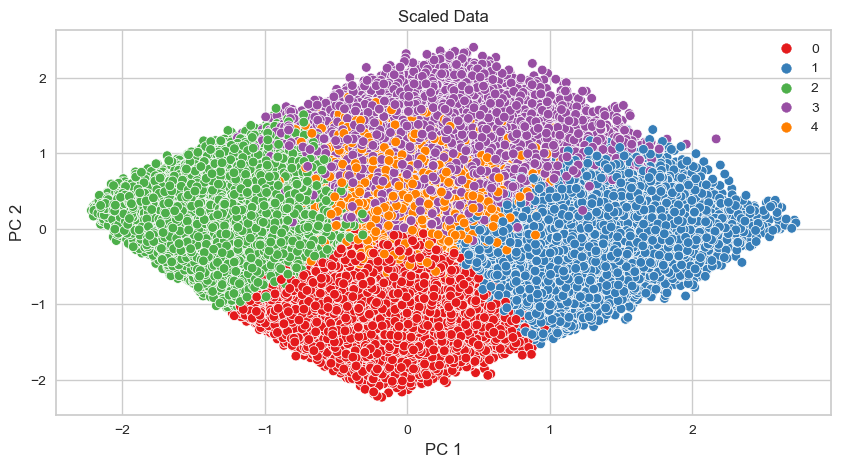

In [ ]:
pca_2d_scaled=PCA(n_components=2, random_state=0).fit(scaled_data)
twod_scaled=pca_2d_scaled.transform(scaled_data)

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue= clusters ,palette='Set1',ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scaled Data')
plt.show()

In [ ]:
# Summing up the different questions groups
ext = questionaire[0:10]
est = questionaire[10:20]
agr = questionaire[20:30]
csn = questionaire[30:40]
opn = questionaire[40:50]

print('ext: ', ext)
print('est: ', est)
print('agr: ', agr)
print('csn: ', csn)
print('opn: ', opn)

ext:  ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
est:  ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
agr:  ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']
csn:  ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
opn:  ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [ ]:
sum_df = pd.DataFrame()
sum_df['extroversion'] = data[ext].mean(axis=1)
sum_df['neurotic'] = data[est].mean(axis=1)
sum_df['agreeable'] = data[agr].mean(axis=1)
sum_df['conscientious'] = data[csn].mean(axis=1)
sum_df['open'] = data[opn].mean(axis=1)
sum_df['cluster'] = clusters
sum_df.head()

,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.0,2.4,3.1,3.2,3.3,2
1,3.4,2.1,3.2,3.1,2.7,4
2,2.9,2.6,2.8,2.8,3.1,4
3,2.6,2.7,3.2,2.7,3.1,3
4,3.5,2.3,3.0,3.2,3.6,2


In [ ]:
sum_df.groupby('cluster').mean().reset_index()

,cluster,extroversion,neurotic,agreeable,conscientious,open
0,0,3.065098,3.412919,3.293488,3.203168,3.347396
1,1,2.965917,3.653732,3.151429,3.172182,3.241797
2,2,3.084549,2.415661,3.206040,3.103396,3.323970
3,3,2.969783,2.588428,2.917596,2.985540,3.197717
4,4,3.049685,3.012384,3.191690,3.160237,3.237461


### Cluster Interpretation:

From the mean of personality scores we can conclude that:

**Cluster 0:**
- Low extroversion.
- High neuroticism.
- Moderate agreeableness.
- Moderate conscientiousness.
- Moderate openness to experience.
  
This cluster seems to exhibit moderate extroversion but leans towards higher neuroticism, suggesting a propensity for negative emotions or stress. They seem moderately agreeable, conscientious, and open to experiences.

**Cluster 1:**
- Moderate extroversion.
- Moderate neuroticism.
- High agreeableness.
- Moderate conscientiousness.
- High openness to experience.
  
This cluster shows moderate extroversion and neuroticism but stands out for higher agreeableness and openness to experience. They appear friendly, cooperative, and open-minded.

**Cluster 2:**
- Moderate extroversion.
- Moderate neuroticism.
- Moderate agreeableness.
- Moderate conscientiousness.
- Moderate openness to experience.
  
This cluster demonstrates moderate scores across all traits, indicating a balanced profile without extreme tendencies in any specific trait.

**Cluster 3:**
- Low extroversion.
- Low neuroticism.
- Low agreeableness.
- Low conscientiousness.
- Moderate openness to experience.
  
This cluster presents low scores in extroversion, neuroticism, agreeableness, and conscientiousness, indicating a reserved, stable, less sociable, and less cooperative profile with moderate openness to experience.

**Cluster 4:**
- High extroversion.
- Low neuroticism.
- High agreeableness.
- High conscientiousness.
- High openness to experience.
  
This cluster showcases high extroversion, low neuroticism, and high scores in agreeableness, conscientiousness, and openness to experience. This group appears sociable, emotionally stable, cooperative, conscientious, and open-minded.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


mean_cluster = sum_df.groupby('cluster').mean().reset_index()

# Function to create radar charts
def create_radar_chart(row):
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=[row['extroversion'], row['neurotic'], row['agreeable'], row['conscientious'], row['open']],
        theta=['Extroversion', 'Neurotic', 'Agreeable', 'Conscientious', 'Open'],
        fill='toself'
    ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 5])),
        showlegend=False,
        title=f'Radar Chart for Cluster {row["cluster"]}'
    )

    fig.show()

# Create radar chart for each cluster
for i, row in mean_cluster.iterrows():
    create_radar_chart(row)


# Save model

In [ ]:

# Combine preprocessing and model in a pipeline
kmeans_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('kmeans', kmeans)
])

In [ ]:
# Save the combined pipeline
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(kmeans_pipeline, file)

# Conclusion

We cluster the data to be 5 cluster. From the cluster characteristics of each cluster we can name the each cluster


1. **Cluster 0: Tranquil Introverts** (Moderately Reserved)
   - Represents individuals who are moderately reserved and inclined towards introspection.

2. **Cluster 1: Harmony Seekers** (Balanced and Open)
   - Signifies a balanced and open-minded group seeking harmony and new experiences.

3. **Cluster 2: Versatile Moderates** (Middle-of-the-road)
   - Describes a flexible and adaptable group with moderate traits across the board.

4. **Cluster 3: Serene Stoics** (Reserved and Stable)
   - Depicts reserved yet emotionally stable individuals with a calm demeanor.

5. **Cluster 4: Radiant Collaborators** (Social and Stable)
   - Captures the vibrancy and collaborative nature of socially active and stable individuals.
